# Eigen Decomposition and SVD Applications

https://github.com/mikexcohen/LinAlg4DataScience/blob/main/LA4DS_ch15.ipynb

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec # for the subplots

import pandas as pd
import seaborn as sns

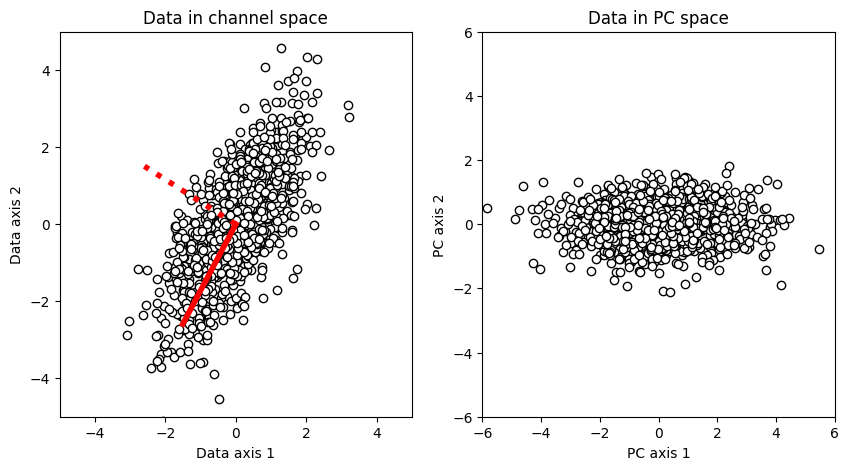

In [3]:
# Create some correlated data
X = np.random.randn(1000,2)
X[:,1] = np.sum(X,axis=1)

# quick PCA
evals,evecs = np.linalg.eig( np.cov(X.T,ddof=1) )
scores = X @ evecs

# show plot
_,axs = plt.subplots(1,2,figsize = (10,5))
axs[0].plot(X[:,0],X[:,1],'o',markeredgecolor='black',markerfacecolor='white')
axs[0].plot([0,3*evecs[0,1]],[0,3*evecs[1,1]],'r-',linewidth=4,label='PC1')
axs[0].plot([0,3*evecs[0,0]],[0,3*evecs[1,0]],'r:',linewidth=4,label='PC2')
axs[0].axis([-5,5,-5,5])
axs[0].set_xlabel('Data axis 1')
axs[0].set_ylabel('Data axis 2')
axs[0].set_title('Data in channel space')

axs[1].plot(scores[:,1],scores[:,0],'ko',markerfacecolor='w')
axs[1].set_xlabel('PC axis 1')
axs[1].set_ylabel('PC axis 2')
axs[1].axis([-6,6,-6,6])
axs[1].set_title('Data in PC space')

plt.show()

In [10]:
# Exercise 15-1

# Data citation: Akbilgic, Oguz. (2013). ISTANBUL STOCK EXCHANGE. UCI Machine Learning Repository.
# data source website: https://archive-beta.ics.uci.edu/ml/datasets/istanbul+stock+exchange

# import the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx"
data = pd.read_excel(url,index_col=0,skiprows=1)

# let's have a look
data

c:\Users\Paul.Carvalho\Documents\data science\python\Linear-Algebra\venv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,,
2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802
...,...,...,...,...,...,...,...,...,...
2011-02-16,0.008599,0.013400,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
2011-02-17,0.009310,0.015977,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039
2011-02-18,0.000191,-0.001653,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938


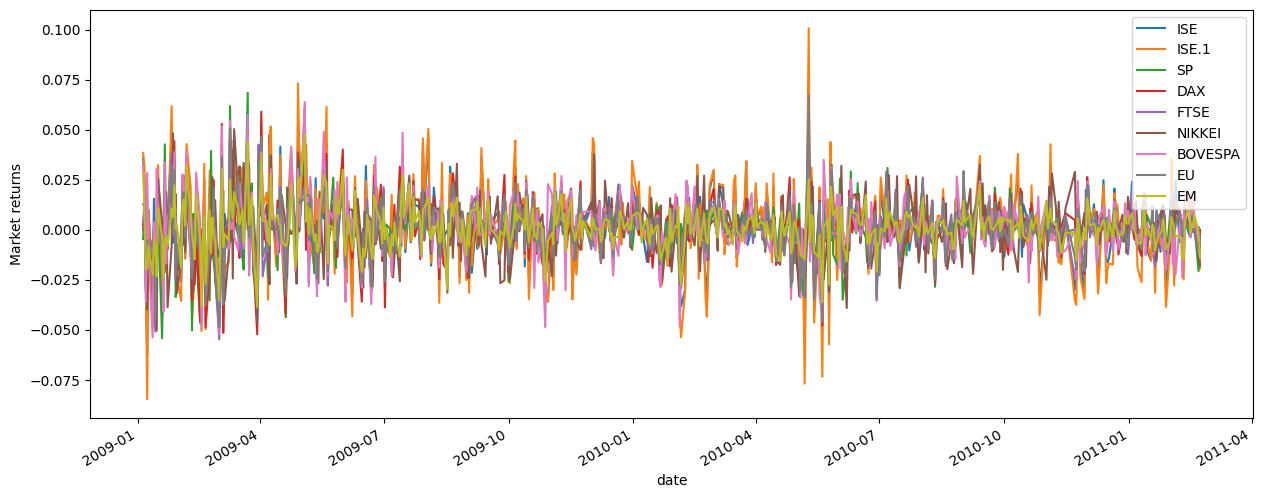

In [11]:
data.plot(figsize=(15,6), ylabel="Market returns")
plt.show()

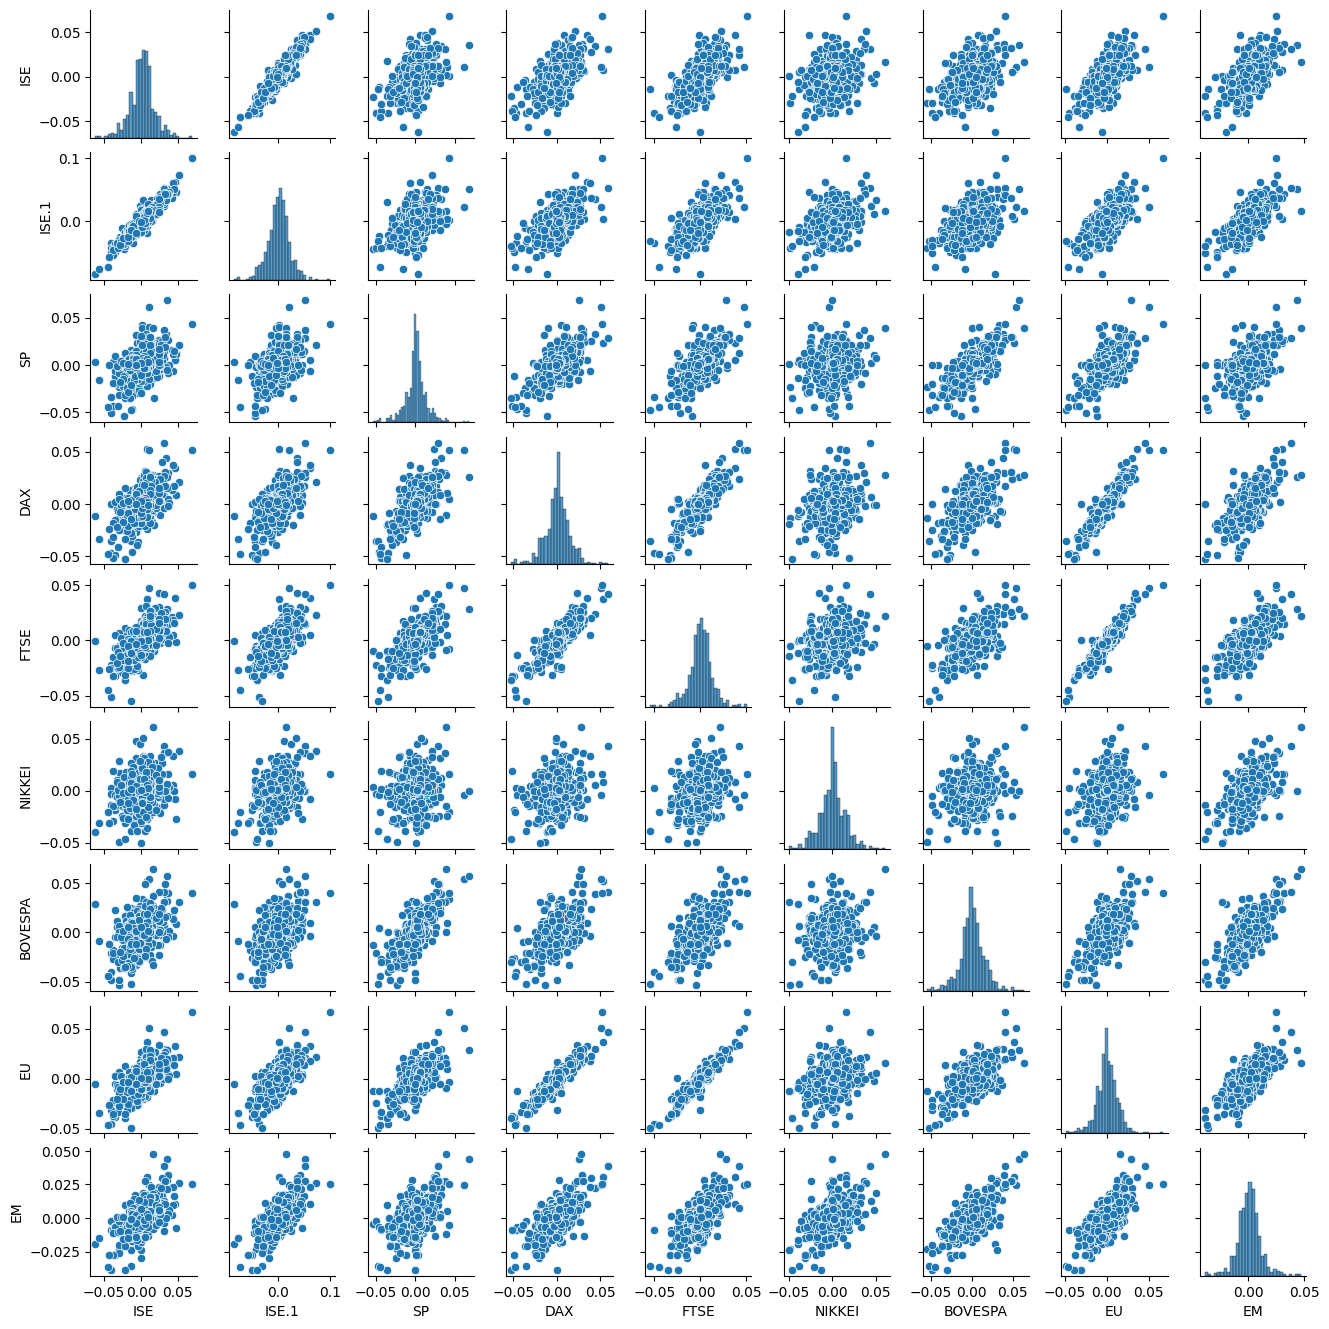

In [14]:
sns.pairplot(data, height=1.5)
plt.show()


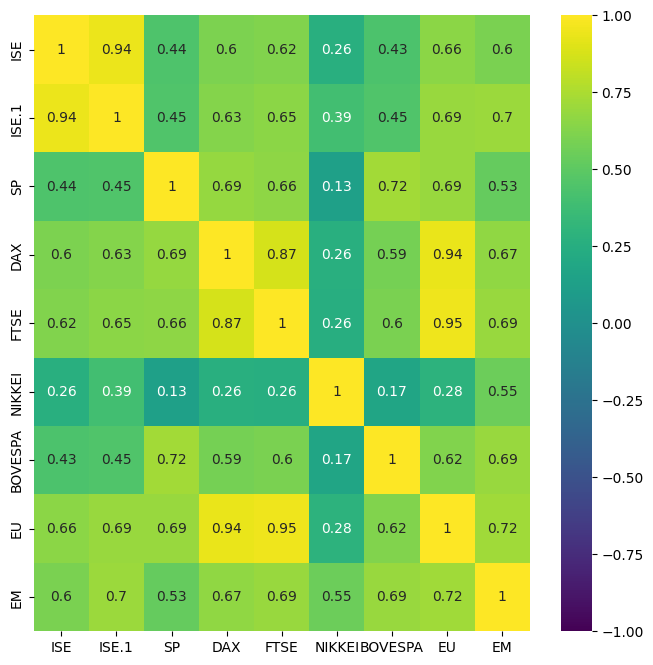

In [16]:
plt.figure(figsize=(8,8))
heatmap = sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True,cmap='viridis')
plt.show()

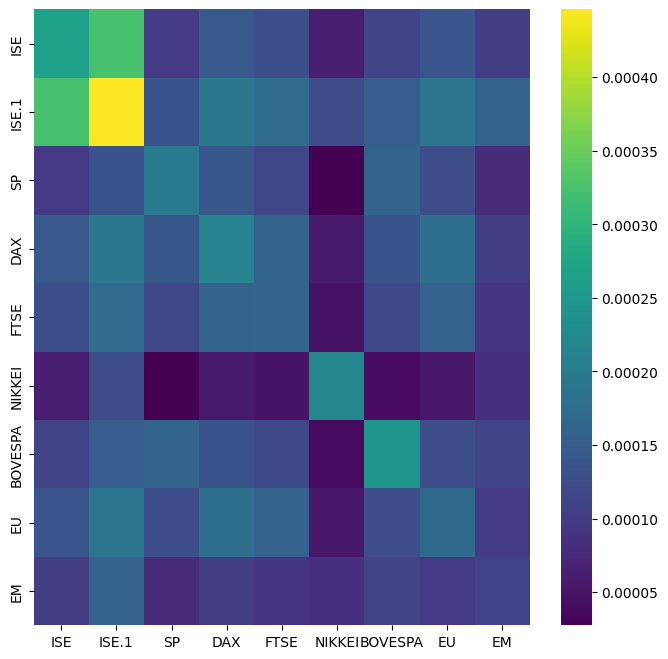

In [17]:
plt.figure(figsize=(8,8))
heatmap = sns.heatmap(data.cov(),cmap='viridis')
plt.show()

In [53]:
# PCA

# 1. Covariance matrix
X = data.values # extract data
X = X - np.mean(X, axis=0, keepdims=True) # mean-center via broadcasting

covmat = X.T@X / (X.shape[0]-1)

# 2. Eigendecomposition
evals,evecs = np.linalg.eig(covmat)

# 3. Sort results
sidx = np.argsort(evals)[::-1]
evals = evals[sidx]
evecs = evecs[:,sidx]

# 4. Component score
components = data.values @ evecs[:,0:2]
print(components.shape)

# Eigenvalues to percent percent variance
factor_scores = 100*evals/np.sum(evals)

(536, 2)


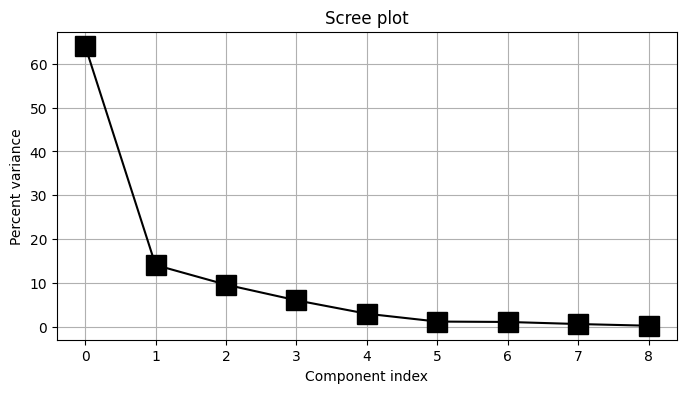

In [51]:
# Scree plot
plt.figure(figsize=(8,4))
plt.plot(factor_scores, 'ks-', markersize=15)
plt.xlabel("Component index")
plt.ylabel("Percent variance")
plt.title("Scree plot")
plt.grid()
plt.show()

In [57]:
# Show that the variance of the component time series is equal to the eigenvalue of that component
print(np.var(components, axis=0, ddof=1))

print(evals[0:2])

[0.0013006  0.00028585]
[0.0013006  0.00028585]


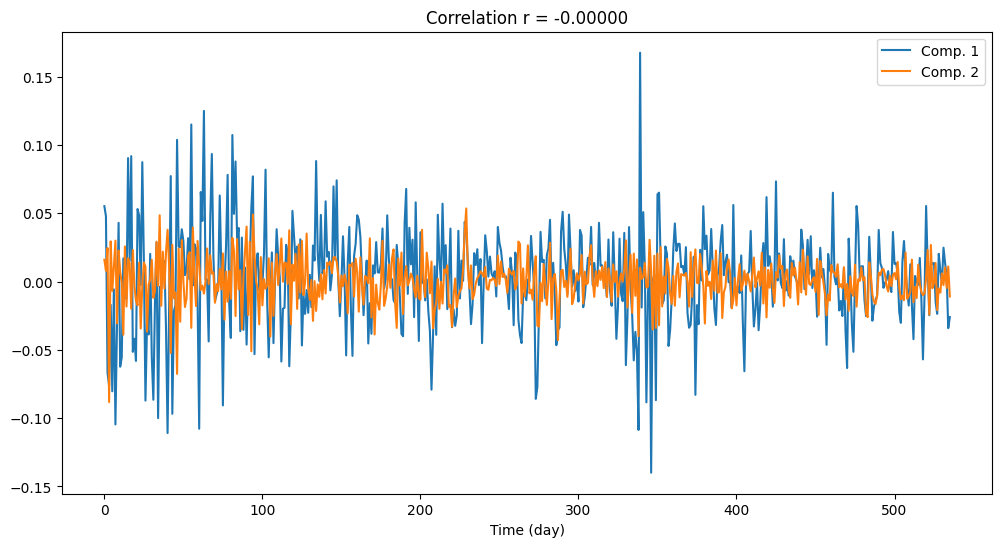

In [70]:
plt.figure(figsize=(12,6))
plt.plot(components)
plt.legend(["Comp. 1", "Comp. 2"])
plt.xlabel("Time (day)")
plt.title(f"Correlation r = {np.corrcoef(components.T)[0,1]:.5f}")
plt.show()

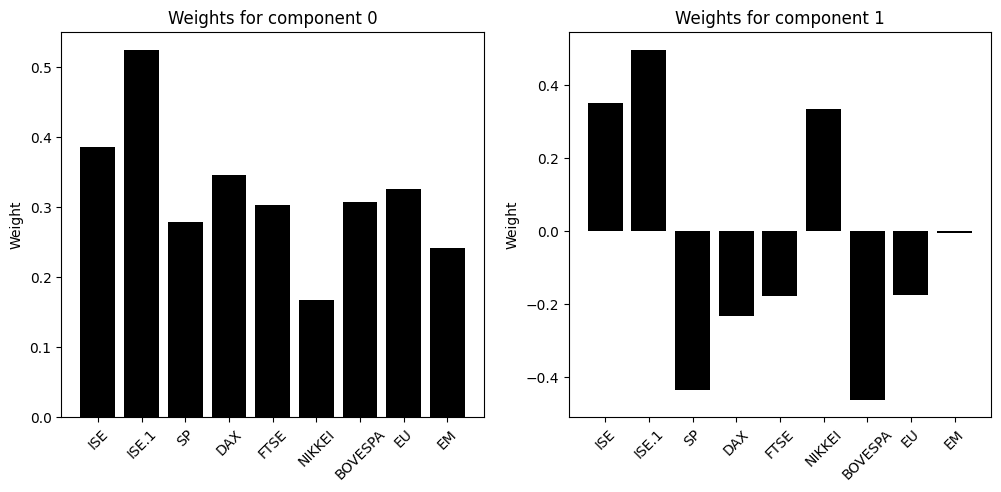

In [81]:
_,axs=plt.subplots(1,2,figsize=(12,5))

for i in range(2):
    axs[i].bar(range(X.shape[1]),evecs[:,i],color='black')
    axs[i].set_xticks(range(X.shape[1]))
    axs[i].set_xticklabels(data.columns,rotation=45)
    axs[i].set_ylabel("Weight")
    axs[i].set_title(f"Weights for component {i}")

plt.show()


In [103]:
# Exercise 15-2

# SVD of covariance matrix
U,s,Vt = np.linalg.svd(covmat)

print(np.sort(s)[0:4])
print(np.sort(evals)[0:4])

print(U[:,0])
print(evecs[:,0])

[5.00103709e-06 1.28347506e-05 2.23967857e-05 2.42643361e-05]
[5.00103709e-06 1.28347506e-05 2.23967857e-05 2.42643361e-05]
[-0.3864847  -0.52390953 -0.27860507 -0.34621538 -0.30322542 -0.16781756
 -0.30741897 -0.32544121 -0.24111348]
[0.3864847  0.52390953 0.27860507 0.34621538 0.30322542 0.16781756
 0.30741897 0.32544121 0.24111348]


In [111]:
# SVD on data matrix
U,s,Vt = np.linalg.svd(X)  # SVD

print(evals[:4])
print(s[:4]**2/(X.shape[0]-1))

print(evecs[:,0])
print(Vt[0,:])



[0.0013006  0.00028585 0.00019503 0.00012253]
[0.0013006  0.00028585 0.00019503 0.00012253]
[0.3864847  0.52390953 0.27860507 0.34621538 0.30322542 0.16781756
 0.30741897 0.32544121 0.24111348]
[-0.3864847  -0.52390953 -0.27860507 -0.34621538 -0.30322542 -0.16781756
 -0.30741897 -0.32544121 -0.24111348]



Explained Variance Ratio: [0.64101405 0.1408853 ]
-6.115495449227007e-17


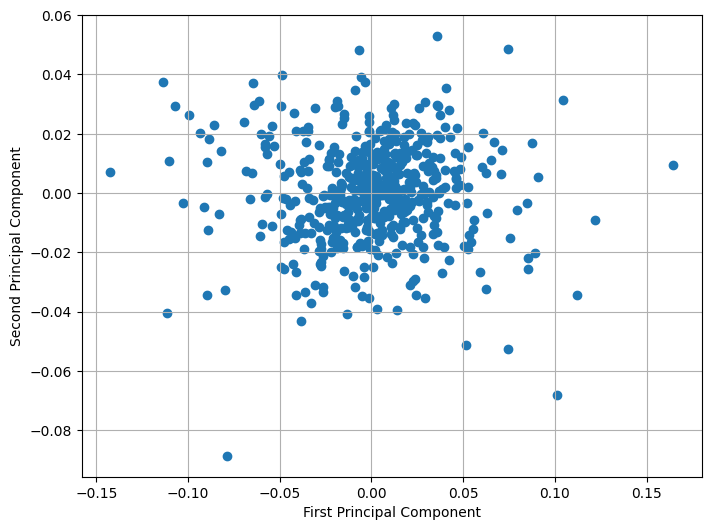

In [123]:
# Exercise 15-3

from sklearn.decomposition import PCA

# Instantiate PCA and keep 2 components
pca = PCA(n_components=2)

# Fit the model to the data and transform it
components = pca.fit_transform(X)

print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)

print(np.corrcoef(components.T)[0,1])

# Visualize the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid()
plt.show()

In [129]:
# Exercise 15-4

# PCA on simulated data
x = np.hstack((np.random.randn(1000,1),.05*np.random.randn(1000,1)))

# rotation matrices
th = -np.pi/6
R1 = np.array([ [np.cos(th), -np.sin(th)],
                [np.sin(th),  np.cos(th)] ])
th = -np.pi/3
R2 = np.array([ [np.cos(th), -np.sin(th)],
                [np.sin(th),  np.cos(th)] ])

# create the data
X = np.vstack((x@R1,x@R2))
X.shape

(2000, 2)

In [135]:
# PCA via SVD

U,s,Vt = np.linalg.svd(X-np.mean(X,axis=0,keepdims=True))
s = s**2 / (X.shape[0]-1)
print(s)
Vt *= 2

[1.03921122 0.07702022]


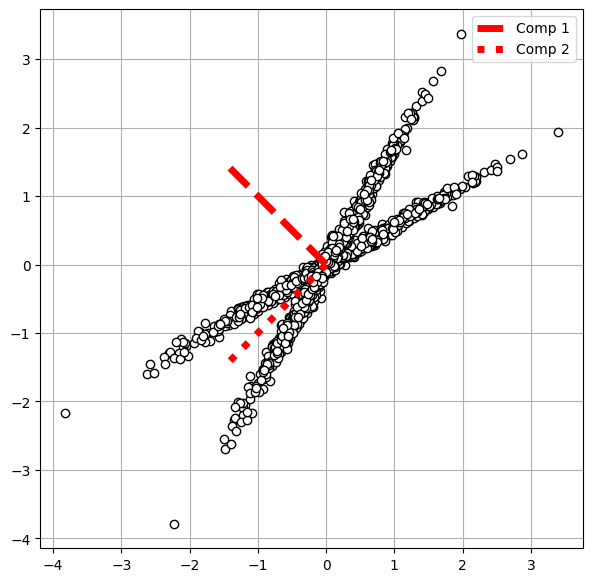

In [136]:
plt.figure(figsize=(7,7))
plt.plot(X[:,0],X[:,1],'ko',markerfacecolor='w')
plt.plot([0,Vt[0,0]],[0,Vt[1,0]],'r--',linewidth=5,label='Comp 1')
plt.plot([0,Vt[0,1]],[0,Vt[1,1]],'r:',linewidth=5,label='Comp 2')
plt.legend()
plt.grid()
plt.show()

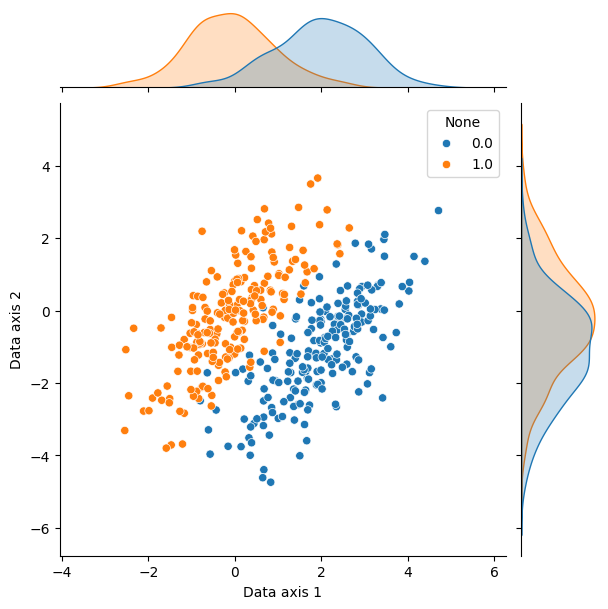

In [147]:
# Exercise 15-5
n = 200

A = np.random.randn(n,2)
A[:,1] += A[:,0]
A += np.array([2,-1])

B = np.random.randn(n,2)
B[:,1] += B[:,0]

X = np.vstack((A,B))
labels = np.append(np.zeros(n),np.ones(n))

ax = sns.jointplot(x = X[:,0], y = X[:,1], hue = labels)
ax.ax_joint.set_xlabel("Data axis 1")
ax.ax_joint.set_ylabel("Data axis 2")
plt.show()


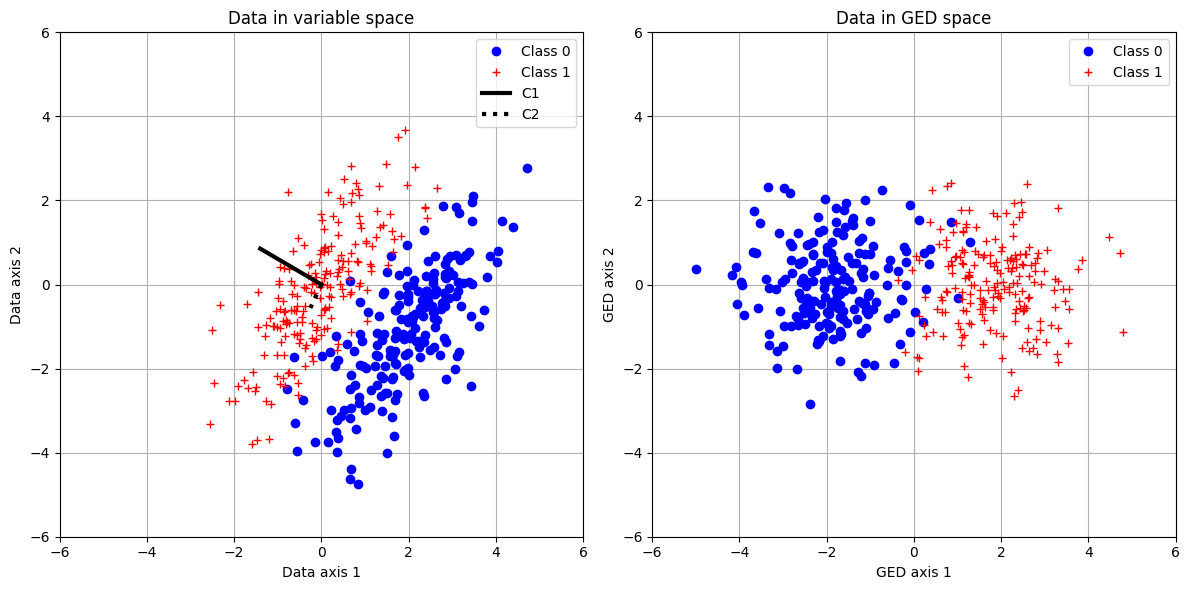

In [172]:
# 15-6

# LDA

# Within class variance Cw
covA = np.cov(A.T)
covB = np.cov(B.T)
covW = (covA + covB)/2

# Between class covariance Cb
muA = np.mean(A,axis=0)
muB = np.mean(B,axis=0)
muAB = np.vstack((muA, muB))
covB = np.cov(muAB.T,ddof=1)

# Eigendecom
from scipy.linalg import eigh
evals,evecs = eigh(covB,covW)

# Sort
sidx = np.argsort(evals[::-1])
evals = evals[sidx]
evecs = evecs[:,sidx]

# Project mean-centered data onto the GED axes
projA = (X - np.mean(X,axis=0)) @ evecs

# show the data
_,axs = plt.subplots(1,2,figsize=(12,6))
marker = ['bo','r+']
for i in range(2):
  axs[0].plot(X[labels==i,0],X[labels==i,1],marker[i],label=f'Class {i}')

axs[0].plot([0,evecs[0,0]],[0,evecs[1,0]],'k-',linewidth=3,label='C1')
axs[0].plot([0,evecs[0,1]],[0,evecs[1,1]],'k:',linewidth=3,label='C2')
axs[0].set_xlabel('Data axis 1')
axs[0].set_ylabel('Data axis 2')
axs[0].set_title('Data in variable space')

# and again in the GED space
for i in range(2):
  axs[1].plot(projA[labels==i,0],projA[labels==i,1],marker[i],label=f'Class {i}')
axs[1].set_xlabel('GED axis 1')
axs[1].set_ylabel('GED axis 2')
axs[1].set_title('Data in GED space')

# common settings
for i in range(2):
  axs[i].axis([-6,6,-6,6])
  axs[i].grid()
  axs[i].legend()

plt.tight_layout()
plt.show()

Prediction accuracy: 96.75%


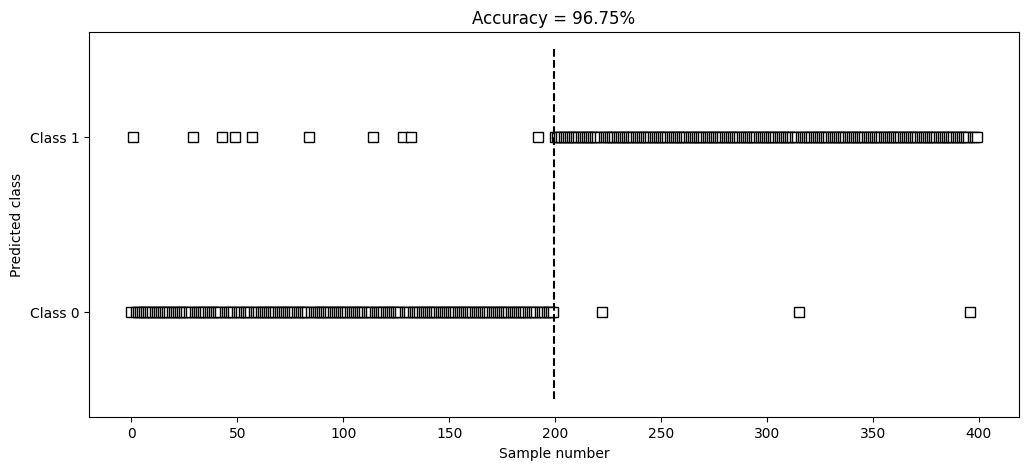

In [180]:
# prediction
predictedLabel = (projA[:,0] > 0)+0

print(f'Prediction accuracy: {100*np.mean( predictedLabel==labels )}%')

# show the results
plt.figure(figsize=(12,5))
plt.plot(predictedLabel,'ks',markersize=7,markerfacecolor='w',linewidth=2)
plt.plot([n-.5,n-.5],[-.5,1.5],'k--')
plt.xlabel('Sample number')
plt.ylabel('Predicted class')
plt.yticks([0,1],labels=['Class 0','Class 1'])
plt.title(f'Accuracy = {100*np.mean(predictedLabel==labels):.2f}%')
plt.show()

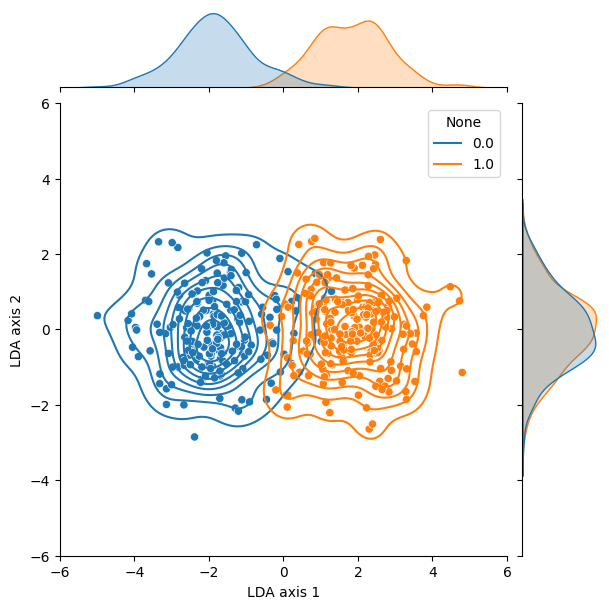

In [181]:
# redraw the jointplot in the GED space (used in Figure 2)
ax = sns.jointplot(x=projA[:,0],y=projA[:,1],hue=labels,xlim=[-6,6],ylim=[-6,6])
ax.ax_joint.set_xlabel('LDA axis 1')
ax.ax_joint.set_ylabel('LDA axis 2')
ax.plot_joint(sns.kdeplot)
plt.show()

In [185]:
# Exercise 15-7

print(evecs.T@evecs)

print(np.round(evecs.T @ covW @ evecs,3))

[[ 2.69521901 -0.11877757]
 [-0.11877757  0.37543101]]
[[ 1.  0.]
 [-0.  1.]]
